<a href="https://colab.research.google.com/github/Izyakowich/TMO/blob/main/TMO_RK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# РК №2 Вариант 3 Линейная/логистическая регрессия Случайный лес

###Изибаев А.А. ИУ5-61Б

https://www.kaggle.com/datasets/altavish/boston-housing-dataset

Задание. Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

In [44]:
# библиотеки
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Загрузка данных
data = pd.read_csv('HousingData.csv')

In [45]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [46]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [48]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Заполним пропуски средним значением

In [49]:
columns_with_missing_values = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

for column in columns_with_missing_values:
    mean_value = data[column].mean()
    data[column].fillna(mean_value, inplace=True)

In [50]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: >

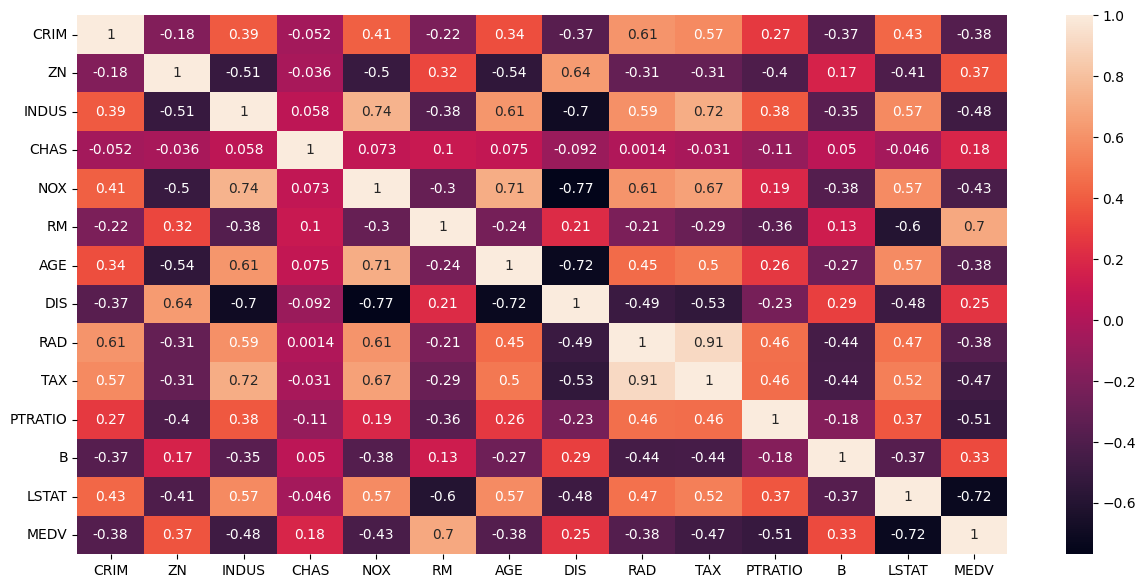

In [51]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True)

##Линейная регрессия

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

# Определение признаков и целевой переменной
X = data.drop(columns=['MEDV'])  # Все признаки, кроме MEDV
y = data['MEDV']  # Целевая переменная - MEDV

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Создание и обучение модели линейной регрессии
lr = LinearRegression()
lr.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_lr = lr.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f"Модель линейной регрессии:")
print(f"Среднеквадратичная ошибка (MSE) = {mse}")
print(f"Средняя абсолютная ошибка (MAE) = {mae}")
print(f"Коэффициент детерминации (R²) = {r2}")

Модель линейной регрессии:
Среднеквадратичная ошибка (MSE) = 25.01767202384268
Средняя абсолютная ошибка (MAE) = 3.1499233573457692
Коэффициент детерминации (R²) = 0.6588520195508143


##Случайный лес

In [54]:
# Создание и обучение модели случайного леса
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_rf = rf.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"Модель случайного леса:")
print(f"Среднеквадратичная ошибка (MSE) = {mse}")
print(f"Средняя абсолютная ошибка (MAE) = {mae}")
print(f"Коэффициент детерминации (R²) = {r2}")

Модель случайного леса:
Среднеквадратичная ошибка (MSE) = 8.227460519607844
Средняя абсолютная ошибка (MAE) = 2.0624411764705886
Коэффициент детерминации (R²) = 0.8878080447367498


Исходя из этих результатов, можно сделать вывод, что модель случайного леса предпочтительнее для данной задачи, тк MSE и MAE у нее меньше, а коэффициент детерминации больше.